#### 연속형 독립변수가 하나인 모델(단순회귀)

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 선형모델 추정 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

In [5]:
%precision 3

'%.3f'

In [6]:
beer = pd.read_csv('C:/Users/KIHyuk/Desktop/파이썬으로 배우는 통계학 교과서 예제소스/5-1-1-beer.csv')

In [8]:
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


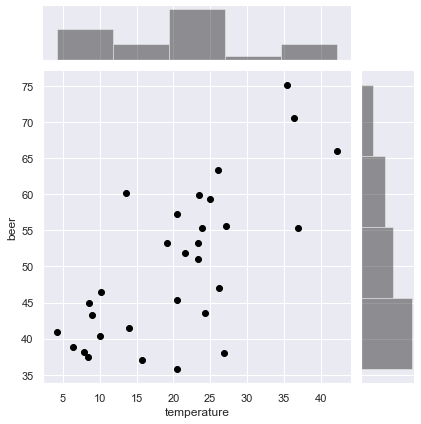

In [9]:
# 시각화
# 산포도로 본 기온과 맥주의 상관관계
sns.jointplot(x='temperature', y='beer', data=beer, color='black')

In [10]:
# 기온과 맥주매상이 양의 상관관계를 보임

#### 모델 구축

In [11]:
# 종속변수에 맥주매상, 독립변수에 기온을 사용한 정규선형 모델
# 맥주매상 ~ N(B0 + B1*기온,sigma_2) 
# 파라미터 추정으로 B0,B1을 추정, 분산은 장애모수이기때문에 무시 

# 현상해석
# 예측

#### statsmodels를 이용한 모델링

In [12]:
lm_model = smf.ols(formula = "beer ~ temperature", data=beer).fit()
# ols => 최소제곱법, 모집단이 정규분포임을 가정하였을때 최소제곱법의 결과는 최대우도법과 일치함

In [13]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           1.11e-05
Time:                        13:23:03   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Intercept => B0
# temperature => B1
# *coef=>계수, std err=>표준오차, t값,
# 귀무가설을 "계수의 값이 0"이라고 했을 때의 p값, 95%신뢰구간에서 하측신뢰한계와 상측신뢰한계

#### AIC를 이용한 모델 선택

In [14]:
# 독립변수가 1개밖에 없기 때문에 Null모델의 AIC와 기온이라는 독립변수가 들어간 모델의 AIC를 비교하는 작업임

In [15]:
null_model = smf.ols("beer ~ 1", data=beer).fit()

In [16]:
null_model.aic

227.94194972563105

In [17]:
lm_model.aic

208.9090293557544

In [ ]:
# null모델과 독립변수가 존재하는 모델의 aic비교 결과 독립변수가 존재하는 모델의 aic가 더 낮음
# 따라서, 기온이라는 독립변수가 있는 모델이 예측정확도가 더 높아질것.

#### 회귀직선

In [ ]:
# 회귀직선은 모델에 의한 종속변수의 추측값을 직선으로 표시한 것
# 종속변수가 연속형 변수일 경우에는 전통적 회귀라고 부름. 비선형 모델의 경우 회귀곡선 

In [ ]:
# seaborn 이용 회귀직선
